<a href="https://colab.research.google.com/github/Mqondisi-Mavuso/cow_facial_recognition/blob/main/Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [64]:
data_dir = "/content/drive/MyDrive/DATA/train"
img_height,img_width=224, 224
batch_size=10
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  label_mode="categorical",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 373 files belonging to 22 classes.
Using 299 files for training.


In [65]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode="categorical",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 373 files belonging to 22 classes.
Using 74 files for validation.


In [66]:
class_names = train_ds.class_names
print(class_names)

['cow1', 'cow10', 'cow11', 'cow12', 'cow13', 'cow14', 'cow15', 'cow16', 'cow17', 'cow18', 'cow19', 'cow2', 'cow20', 'cow21', 'cow22', 'cow3', 'cow4', 'cow5', 'cow6', 'cow7', 'cow8', 'cow9']


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(6):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [75]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.Xception(include_top=False,
                   input_shape=(224, 224, 3),
                   pooling='avg',classes=22,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(22, activation='softmax'))

In [76]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 module_wrapper_24 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_25 (ModuleWr  (None, 1024)             2098176   
 apper)                                                          
                                                                 
 module_wrapper_26 (ModuleWr  (None, 22)               22550     
 apper)                                                          
                                                                 
Total params: 22,982,206
Trainable params: 2,120,726
Non-trainable params: 20,861,480
__________________________________

In [77]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
30/30 [==============================] - 98s 3s/step - loss: 14.1871 - accuracy: 0.2308 - val_loss: 6.9127 - val_accuracy: 0.4054
Epoch 2/10
30/30 [==============================] - 91s 3s/step - loss: 2.7443 - accuracy: 0.6087 - val_loss: 3.8721 - val_accuracy: 0.5000
Epoch 3/10
30/30 [==============================] - 90s 3s/step - loss: 1.5425 - accuracy: 0.6957 - val_loss: 2.3924 - val_accuracy: 0.6757
Epoch 4/10
30/30 [==============================] - 93s 3s/step - loss: 0.7334 - accuracy: 0.8027 - val_loss: 2.2597 - val_accuracy: 0.6081
Epoch 5/10
30/30 [==============================] - 93s 3s/step - loss: 0.7102 - accuracy: 0.8462 - val_loss: 3.2954 - val_accuracy: 0.6486
Epoch 6/10
30/30 [==============================] - 91s 3s/step - loss: 0.9141 - accuracy: 0.8361 - val_loss: 2.3172 - val_accuracy: 0.6892
Epoch 7/10
30/30 [==============================] - 93s 3s/step - loss: 0.4184 - accuracy: 0.9298 - val_loss: 1.6670 - val_accuracy: 0.7297
Epoch 8/10
30/30 [=

**Evaluating the model **

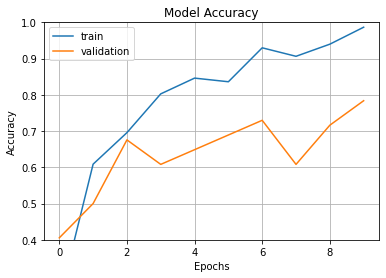

In [79]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

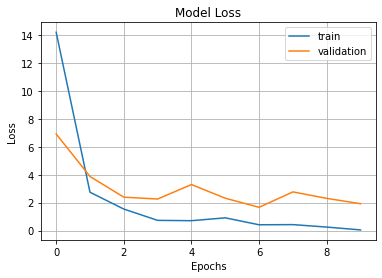

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making Preditions 

In [81]:
import cv2
image=cv2.imread("/content/drive/MyDrive/DATA/test/c4/c4_1.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 [==============================] - 1s 1s/step
The predicted class is cow3


In [82]:
test_dir = '/content/drive/MyDrive/DATA/test'
test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height,img_width),
    batch_size=5,
    label_mode='categorical',
    shuffle=False)


# Evaluate your model
test_loss, test_accuracy = resnet_model.evaluate(test_generator)

# Print the results
print(f"Test accuracy: {test_accuracy}")

Found 220 files belonging to 22 classes.
44/44 [==============================] - 56s 1s/step - loss: 8.3150 - accuracy: 0.1682
Test accuracy: 0.16818182170391083
